In [1]:
import sys
sys.path.append(r"../tools/") 

from observer import ukf

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pickle
from os import path
import sys

In [3]:


filename = 'result_step1_FLOW.pckl'
infile = open(filename,'rb')
flow = pickle.load(infile)
infile.close()

filename = 'result_step1_LEVEL.pckl'
infile = open(filename,'rb')
level = pickle.load(infile)
infile.close()

filename = 'result_step2_SIGNAL_SAT.pckl'
infile = open(filename,'rb')
signal = pickle.load(infile)
infile.close()

filename = 'result_step2_SIGNAL_BIAS.pckl'
infile = open(filename,'rb')
X0 = pickle.load(infile)
infile.close() 

In [4]:
lambda1 = 0
lambda2 = 2
lambda3 = 4

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


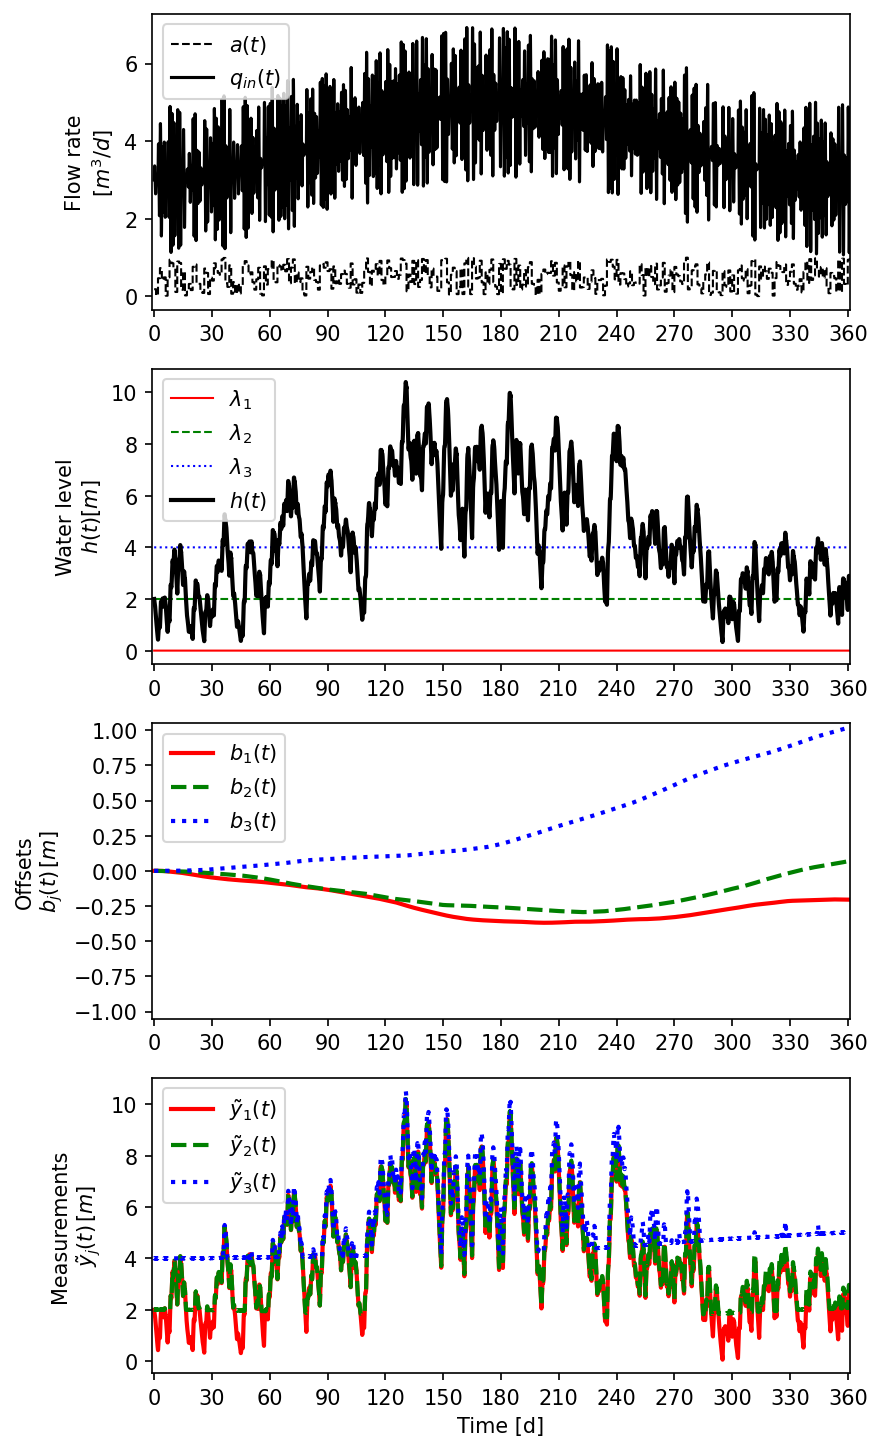

In [5]:
fig, axs = plt.subplots(4,1,figsize=(6,12),dpi=150)

ax = axs[0]
ax.step(flow[:,0],flow[:,1],'k--',label='$a(t)$',lw=1)
ax.plot(flow[:,0],flow[:,2],'k-',label='$q_{in}(t)$');
ax.set_ylabel('Flow rate\n$[m^3/d]$')
ax.legend(loc='upper left')
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));

ax = axs[1]
ax.plot(level[:,0],level[:,1]*0+lambda1,'r-',label='$\lambda_1$',lw=1);
ax.plot(level[:,0],level[:,1]*0+lambda2,'g--',label='$\lambda_2$',lw=1);
ax.plot(level[:,0],level[:,1]*0+lambda3,'b:',label='$\lambda_3$',lw=1);
ax.plot(level[:,0],level[:,1],'k-',label='$h(t)$',lw=2);
ax.set_ylabel('Water level\n$h(t) [m]$')
ax.legend(loc='upper left')
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));

ax = axs[2]
ax.plot(signal[:,0],X0[:,0]/1000,'r-',label='${b}_1(t)$',lw=2);
ax.plot(signal[:,0],X0[:,1]/1000,'g--',label='${b}_2(t)$',lw=2);
ax.plot(signal[:,0],X0[:,2]/1000,'b:',label='${b}_3(t)$',lw=2);
ax.set_ylabel('Offsets\n$b_j(t) \, [m]$')
ax.legend(loc='upper left')
ax.set_yticks(np.arange(-1,1.1,0.25));
ax.set_ylim([-1.05,1.05])
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));

ax = axs[3]
ax.plot(signal[:,0],signal[:,1]/1000,'r-',label='$\~{y}_1(t)$',lw=2);
ax.plot(signal[:,0],signal[:,2]/1000,'g--',label='$\~{y}_2(t)$',lw=2);
ax.plot(signal[:,0],signal[:,3]/1000,'b:',label='$\~{y}_3(t)$',lw=2);
ax.legend(loc='upper left')
ax.set_ylabel('Measurements\n$\~{y}_j(t) \, [m]$')
ax.set_xlabel('Time [d]')
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));

fig.savefig('./figure/simulation_A.eps',bbox_inches='tight');
fig.savefig('./figure/simulation_A.tiff',bbox_inches='tight');

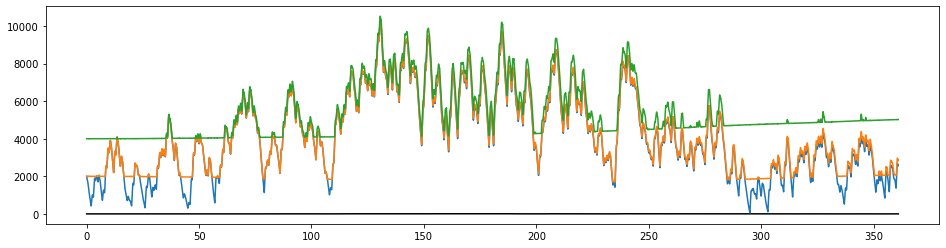

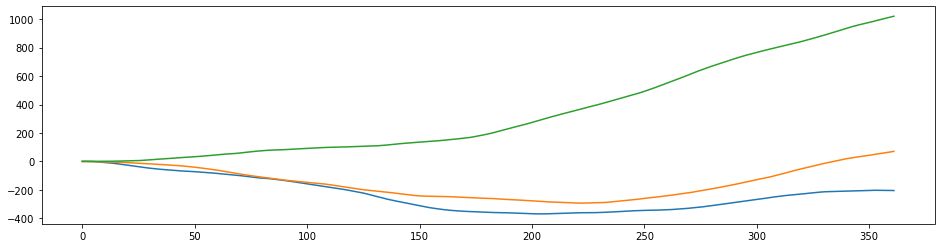

In [6]:

path_one_up = path.abspath(path.join(path.abspath('') ,".."))
sys.path.append(path_one_up)

fig, ax = plt.subplots(1,1,figsize=(16,4))
ax.plot(level[:,0],level[:,1:],'k-')
ax.plot(signal[:,0],signal[:,1:],'-')
fig, ax = plt.subplots(1,1,figsize=(16,4))
ax.plot(signal[:,0],X0[:,:],'-');

# Initialize and run UKF

In [7]:
# Observer model parameters
A = 1
B = 100 
gamma = 1 #250/360*np.sqrt(0.01)
sigma = 1

In [8]:

n = 4*24*21+1 #signal.shape[0]
y_ = signal[:n,1:] 
u=0
ffun_UKF = lambda xa, u: np.array([A*xa[0]+B*xa[4],
                                   xa[1]+gamma*xa[5],
                                   xa[2]+gamma*xa[6],
                                   xa[3]+gamma*xa[7]])
hfun_UKF = lambda xa, u: np.array([np.max([xa[0],lambda1*1000])+xa[1],
                                   np.max([xa[0],lambda2*1000])+xa[2],
                                   np.max([xa[0],lambda3*1000])+xa[3]])+sigma*xa[8:]
Lx = 4
Ly = 3
ukf0 = ukf(ffun=ffun_UKF,hfun=hfun_UKF,Lx=Lx,Ly=Ly,Lv=Lx,Lw=Ly,alpha=1,beta=0,kappa=[])
ukf0.reset()

xbar_ = []
sigmaxbar_ = []

ukf0.reset(xbar = np.array([2000,0,0,0])[:,None],Pbar=np.eye(Lx) )

for index,ym in enumerate(y_):
    
    ukf0.update(u=u,ytil=ym)
    
    xbar_.append(ukf0.xbar[:,0])
    sigmaxbar_.append(np.diag(ukf0.Pbar)**(1/2))
    pass


11


In [9]:
tdelta = level[1,0]-level[0,0]
xbar_ = np.array(xbar_)
sigmaxbar_ = np.array(sigmaxbar_)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

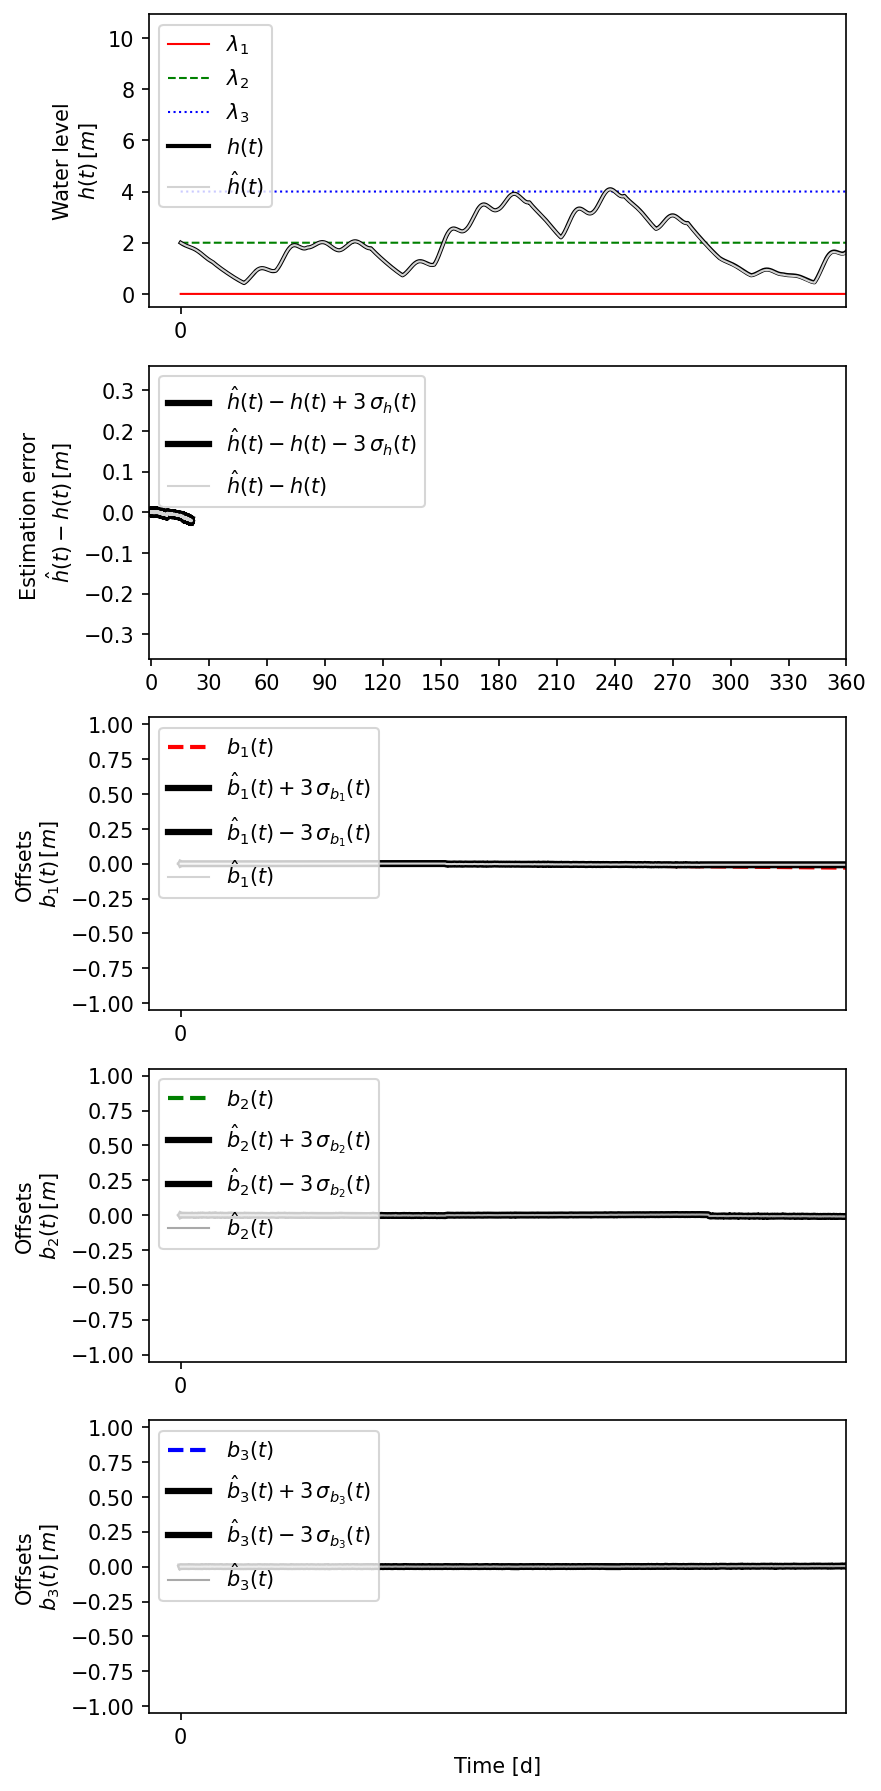

In [20]:
fig, axs = plt.subplots(5,1,figsize=(6,15),dpi=150)

ax = axs[0]
ax.plot(level[:,0],level[:,1]*0+lambda1,'r-',label='$\lambda_1$',lw=1);
ax.plot(level[:,0],level[:,1]*0+lambda2,'g--',label='$\lambda_2$',lw=1);
ax.plot(level[:,0],level[:,1]*0+lambda3,'b:',label='$\lambda_3$',lw=1);
ax.plot(level[:,0],level[:,1],'k-',label='$h(t)$',lw=2);
ax.plot(signal[:n,0],(xbar_[:,0])/1000,'-',label='$\hat{h}(t)$',lw=1,color='lightgrey');
ax.set_ylabel('Water level\n$h(t)\, [m]$')
ax.legend(loc='upper left')
ax.set_xticks(np.arange(0,361,30));
ax.set_xlim([-1,signal[n,0]])

ax = axs[1]
ax.plot(signal[:n,0],(xbar_[:,0]+3*sigmaxbar_[:,0])/1000-level[:n,1],'-',label='$\hat{h}(t)-h(t)+3\,\sigma_{h}(t)$',lw=3,color='black');
ax.plot(signal[:n,0],(xbar_[:,0]-3*sigmaxbar_[:,0])/1000-level[:n,1],'-',label='$\hat{h}(t)-h(t)-3\,\sigma_{h}(t)$',lw=3,color='black');
ax.plot(signal[:n,0],(xbar_[:,0])/1000-level[:n,1],'-',color= 'lightgrey',label='$\hat{h}(t)-h(t)$',lw=1);
ax.set_ylabel('Estimation error \n$\hat{h}(t)-h(t)\, [m]$')
ax.legend(loc='upper left')
ax.set_xlim([-1,signal[n,0]])
ax.set_ylim([-0.36,0.36])
ax.set_xticks(np.arange(0,361,30));
ax.set_yticks(np.arange(-0.3,0.4,0.1));

ax = axs[2]
ax.plot(signal[:,0],X0[:,0]/1000,'r--',label='${b}_1(t)$',lw=2);
ax.plot(signal[:n,0],(xbar_[:,1]+3*sigmaxbar_[:n,1])/1000,'-',label='$\hat{b}_1(t)+3\,\sigma_{b_1}(t)$',lw=3,color='black');
ax.plot(signal[:n,0],(xbar_[:,1]-3*sigmaxbar_[:n,1])/1000,'-',label='$\hat{b}_1(t)-3\,\sigma_{b_1}(t)$',lw=3,color='black');
ax.plot(signal[:n,0],(xbar_[:,1])/1000,'-',label='$\hat{b}_1(t)$',lw=1,color='lightgrey');
ax.set_ylabel('Offsets\n$b_1(t) \, [m]$')
ax.legend(loc='upper left')
ax.set_yticks(np.arange(-1,1.1,0.25));
ax.set_ylim([-1.05,1.05])
ax.set_xticks(np.arange(0,361,30));
ax.set_xlim([-1,signal[n,0]])

ax = axs[3]
ax.plot(signal[:,0],X0[:,1]/1000,'g--',label='${b}_2(t)$',lw=2);
ax.plot(signal[:n,0],(xbar_[:,2]+3*sigmaxbar_[:n,2])/1000,'-',label='$\hat{b}_2(t)+3\,\sigma_{b_2}(t)$',lw=3,color='black');
ax.plot(signal[:n,0],(xbar_[:,2]-3*sigmaxbar_[:n,2])/1000,'-',label='$\hat{b}_2(t)-3\,\sigma_{b_2}(t)$',lw=3,color='black');
ax.plot(signal[:n,0],(xbar_[:,2])/1000,'-',label='$\hat{b}_2(t)$',lw=1,color='darkgrey');
ax.set_ylabel('Offsets\n$b_2(t) \, [m]$')
ax.legend(loc='upper left')
ax.set_yticks(np.arange(-1,1.1,0.25));
ax.set_ylim([-1.05,1.05])
ax.set_xticks(np.arange(0,361,30));
ax.set_xlim([-1,signal[n,0]])

ax = axs[4]
ax.plot(signal[:n,0],X0[:n,2]/1000,'b--',label='${b}_3(t)$',lw=2);
ax.plot(signal[:n,0],(xbar_[:,3]+3*sigmaxbar_[:n,3])/1000,'-',label='$\hat{b}_3(t)+3\,\sigma_{b_3}(t)$',lw=3,color='black');
ax.plot(signal[:n,0],(xbar_[:,3]-3*sigmaxbar_[:n,3])/1000,'-',label='$\hat{b}_3(t)-3\,\sigma_{b_3}(t)$',lw=3,color='black');
ax.plot(signal[:n,0],(xbar_[:,3])/1000,'-',label='$\hat{b}_3(t)$',lw=1,color='darkgrey');
ax.set_ylabel('Offsets\n$b_3(t) \, [m]$')
ax.legend(loc='upper left')
ax.set_xlabel('Time [d]')
ax.set_yticks(np.arange(-1,1.1,0.25));
ax.set_ylim([-1.05,1.05])
ax.set_xticks(np.arange(0,361,30));
ax.set_xlim([-1,signal[n,0]])

fig.savefig('./figure/observer_scenarioA.eps',bbox_inches='tight');
fig.savefig('./figure/observer_scenarioA.tiff',bbox_inches='tight');

In [ ]:
fig, axs = plt.subplots(5,1,figsize=(6,15),dpi=300)

ax = axs[0]
ax.plot(level[:,0],level[:,1]*0+0,'r-',label='$\lambda_1$',lw=1);
ax.plot(level[:,0],level[:,1]*0+1.5,'g--',label='$\lambda_2$',lw=1);
ax.plot(level[:,0],level[:,1]*0+3,'b:',label='$\lambda_3$',lw=1);
ax.plot(level[:,0],level[:,1],'k-',label='$h(t)$ [true]',lw=2);
ax.plot(signal[:,0],(xbar_[:,0])/1000,'-',label='$\hat{h}(t)$ [est.]',lw=1,color='lightgrey');
ax.set_ylabel('Water level\n$h(t)\, [m]$')
ax.legend(loc='upper left')
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));

ax = axs[1]
ax.plot(signal[:,0],(xbar_[:,0]+3*sigmaxbar_[:,0])/1000-level[:,1],'-',label='$\hat{h}_1(t)-h(t)+3\,\sigma_{h}(t)$',lw=3,color='black');
ax.plot(signal[:,0],(xbar_[:,0]-3*sigmaxbar_[:,0])/1000-level[:,1],'-',label='$\hat{h}_1(t)-h(t)-3\,\sigma_{h}(t)$',lw=3,color='black');
ax.plot(signal[:,0],(xbar_[:,0])/1000-level[:,1],'-',color= 'lightgrey',label='$\hat{h}(t)-h(t)$',lw=1);
ax.set_ylabel('Level estimation error \n$\hat{h}(t)-h(t)\, [m]$')
ax.legend(loc='lower left')
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));

ax = axs[2]
ax.plot(signal[:,0],(xbar_[:,1]-X0[:,0])/1000,'k-',label='$\hat{b}_1(t)-b_1(t)$');
ax.set_ylabel('Offset estimation error \n$b_1(t) \, [m]$')
ax.legend(loc='lower left')
#ax.set_ylim([-0.57,0.02])
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));

ax = axs[3]
ax.plot(signal[:,0],(xbar_[:,2]-X0[:,1])/1000,'k-',label='$\hat{b}_2(t)-b_2(t)$');
ax.set_ylabel('Offset estimation error \n$b_2(t) \, [m]$')
ax.legend(loc='lower left')
#ax.set_ylim([-0.57,0.02])
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));

ax = axs[4]
ax.plot(signal[:,0],(xbar_[:,3]-X0[:,2])/1000,'k-',label='$\hat{b}_3(t)-b_3(t)$');
ax.set_ylabel('Offset estimation error \n$b_3(t) \, [m]$')
ax.legend(loc='lower left')
ax.set_xlabel('Time [d]')
#ax.set_ylim([-0.57,0.02])
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));
